# UTkarsh Tripathi

### Patanjali Product Web-Scrapping 

#### 10- Dec - 2023

In [7]:
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import matplotlib.pyplot as plt
import neattext.functions as nfx
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, StaleElementReferenceException, ElementClickInterceptedException


## To get All the Categories of products (eg. biscuits, chocolates, medicine, etc.) links from the website

In [4]:
from bs4 import BeautifulSoup

product_link = 'https://www.patanjaliayurved.net/category/natural-health-care/1'

response = requests.get(product_link)
soup = BeautifulSoup(response.text, 'html.parser')


# Find the <ul> tag with class "group-list"
ul_tag = soup.find('ul', class_='nav__list')

# Find all <a> tags within the <ul> tag
if ul_tag:
    links = [a['href'] for a in ul_tag.find_all('a')]
    print(links, end="\n\t")
else:
    print("UL tag not found.")


['https://www.patanjaliayurved.net/category/digestives/138', 'https://www.patanjaliayurved.net/category/health-and-wellness/139', 'https://www.patanjaliayurved.net/category/chyawanprash/150', 'https://www.patanjaliayurved.net/category/badam-pak/151', 'https://www.patanjaliayurved.net/category/ghee/152', 'https://www.patanjaliayurved.net/category/honey/153', 'https://www.patanjaliayurved.net/category/health-drinks/177', 'https://www.patanjaliayurved.net/category/fruit-beverage/184', 'https://www.patanjaliayurved.net/category/diet-food/218', 'https://www.patanjaliayurved.net/category/biscuits-and-cookies/3', 'https://www.patanjaliayurved.net/category/spices/11', 'https://www.patanjaliayurved.net/category/candy/12', 'https://www.patanjaliayurved.net/category/herbal-tea/13', 'https://www.patanjaliayurved.net/category/jam/14', 'https://www.patanjaliayurved.net/category/murabba/15', 'https://www.patanjaliayurved.net/category/dalia-poha-and-vermicelli/130', 'https://www.patanjaliayurved.net/c

#### to get category name from link

In [35]:
for url in links:
    print(f"\n ----> Scraping products from: {url}")
    poduct_category = re.findall(r'[A-Z-a-z]+', url)[-1]
    print(poduct_category)


 ----> Scraping products from: https://www.patanjaliayurved.net/category/digestives/138
digestives

 ----> Scraping products from: https://www.patanjaliayurved.net/category/health-and-wellness/139
health-and-wellness

 ----> Scraping products from: https://www.patanjaliayurved.net/category/chyawanprash/150
chyawanprash

 ----> Scraping products from: https://www.patanjaliayurved.net/category/badam-pak/151
badam-pak

 ----> Scraping products from: https://www.patanjaliayurved.net/category/ghee/152
ghee

 ----> Scraping products from: https://www.patanjaliayurved.net/category/honey/153
honey

 ----> Scraping products from: https://www.patanjaliayurved.net/category/health-drinks/177
health-drinks

 ----> Scraping products from: https://www.patanjaliayurved.net/category/fruit-beverage/184
fruit-beverage

 ----> Scraping products from: https://www.patanjaliayurved.net/category/diet-food/218
diet-food

 ----> Scraping products from: https://www.patanjaliayurved.net/category/biscuits-and-coo

### to capture all the data from website

In [9]:

driver = webdriver.Chrome()  # You may need to download the ChromeDriver executable and specify its path here

all_products = []

for url in links:
    print(f"\n\n\n\n\n ----> Scraping products from: {url}")
    poduct_category = re.findall(r'[A-Z-a-z]+', url)[-1]
    

    driver.get(url)
    count = 0

    while True:
        try:
            # Wait for the "Load More" button to be clickable
            load_more_button = WebDriverWait(driver, 5).until(EC.element_to_be_clickable((By.CLASS_NAME, 'loadmore')))

            # Execute JavaScript to click the "Load More" button
            driver.execute_script("arguments[0].click();", load_more_button)

            # Wait for the new content to load
            WebDriverWait(driver, 5).until(EC.invisibility_of_element_located((By.CLASS_NAME, 'loadmore')))

            # Parse the HTML content
            soup = BeautifulSoup(driver.page_source, 'html.parser')

            # Extract product data and append to the list
            products = soup.find_all('div', {'class': 'single-product'})
            for product in products:
                try:
                    product_name_elem = product.find('h2', {'onclick': lambda x: 'window.location.href=' in x})

                    if product_name_elem:
                        product_name = product_name_elem.text.strip()
                        product_link = product.find('a', {'class': 'products-links'}).get('href')
                        image_link = product.find('img', {'class': 'img-responsive'}).get('src')
                        product_price = product.find('p', {'class': 'priceTag'}).text.strip()
       
                        response = requests.get(product_link)
                        soup = BeautifulSoup(response.text, 'html.parser')
                        
                        quickview_peragraph_divs = soup.find_all('div', {'class': 'quickview-peragraph'})
                        tab_peragraph_divs = soup.find_all('div', {'class': 'tabs'})
                        
                        product_description = ""
                        tab_discription = ""
                        
                        for p_disc, tab_disc in zip(quickview_peragraph_divs, tab_peragraph_divs):
                            product_description += p_disc.get_text(strip=True) + "\n"
                            tab_discription += tab_disc.get_text(strip=True) + "\n"

                        print(poduct_category,"\n", product_name, "\n", product_link, "\n", image_link, "\n", product_price, '\n', product_description, '\n', tab_discription)

                        all_products.append({
                            'poduct_category': poduct_category,
                            'Product Name': product_name,
                            'Link': product_link,
                            'Image': image_link,
                            'Price': product_price,
                            'product_description' : product_description,
                            'tab_discription' : tab_discription
                        })
                        count += 1

                
                except TypeError:
                    print("TypeError is coming. Breaking the loop.")
                    break

        except TimeoutException:
            print("Timed out waiting for element. Scraping individual product data.")


            soup = BeautifulSoup(driver.page_source, 'html.parser')
            products = soup.find_all('div', {'class': 'single-product'})
            
            for product in products:
                try:
                    product_name_elem = product.find('h2', {'onclick': lambda x: 'window.location.href=' in x})

                    if product_name_elem:
                        product_name = product_name_elem.text.strip()
                        product_link = product.find('a', {'class': 'products-links'}).get('href')
                        image_link = product.find('img', {'class': 'img-responsive'}).get('src')
                        product_price = product.find('p', {'class': 'priceTag'}).text.strip()

                        response = requests.get(product_link)
                        soup = BeautifulSoup(response.text, 'html.parser')
                        
                        quickview_peragraph_divs = soup.find_all('div', {'class': 'quickview-peragraph'})
                        tab_peragraph_divs = soup.find_all('div', {'class': 'tabs'})
                        
                        product_description = ""
                        tab_discription = ""
                        
                        for p_disc, tab_disc in zip(quickview_peragraph_divs, tab_peragraph_divs):
                            product_description += p_disc.get_text(strip=True) + "\n"
                            tab_discription += tab_disc.get_text(strip=True) + "\n"

                        print(poduct_category, '\n', product_name, "\n", product_link, "\n", image_link, "\n", product_price, '\n', product_description, '\n', tab_discription)

                        # Add more fields as needed
                        all_products.append({
                            'poduct_category': poduct_category,
                            'Product Name': product_name,
                            'Link': product_link,
                            'Image': image_link,
                            'Price': product_price,
                            'product_description' : product_description,
                            'tab_discription' : tab_discription
                        })
                        count += 1

                except TypeError:
                    print("TypeError is coming. Breaking the loop.")
                    break

            break


driver.quit()

df = pd.DataFrame(all_products)



There was an error managing chrome (error sending request for url (https://googlechromelabs.github.io/chrome-for-testing/known-good-versions-with-downloads.json): error trying to connect: tcp connect error: A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond. (os error 10060)); using driver found in the cache







 ----> Scraping products from: https://www.patanjaliayurved.net/category/digestives/138
Timed out waiting for element. Scraping individual product data.
digestives 
 Patanjali Pachak Jaljeera 
 https://www.patanjaliayurved.net/product/natural-health-care/digestives/patanjali-pachak-jaljeera/690 
 https://www.patanjaliayurved.net/assets/product_images/400x500/1690280967PachakJaljeera-200g1.png 
 ₹ 81                                ₹85 
 Patanjali pachak jal jeera helps in cooling the body. It is anti-acidic, anti-phlegmatic, carminative and digestive. It also contains essential minerals which are beneficial for body functions. It helps in increasing the digestive power. It also acts as a refresher. It helps in treating problems like amlapitta, indigestion, loss of appetite and laziness. It is an indian beverage which is served as an appetizer.
 
 BenefitsIngredientsHow to useOther Product InfoPatanjali pachak jal jeera helps in cooling the body.It is anti-acidic, anti-phlegmatic, c

In [10]:
df

,poduct_category,Product Name,Link,Image,Price,product_description,tab_discription
0,digestives,Patanjali Pachak Jaljeera,https://www.patanjaliayurved.net/product/natur...,https://www.patanjaliayurved.net/assets/produc...,₹ 81 ₹85,Patanjali pachak jal jeera helps in cooling th...,BenefitsIngredientsHow to useOther Product Inf...
1,digestives,Patanjali Pachak Hing Goli,https://www.patanjaliayurved.net/product/natur...,https://www.patanjaliayurved.net/assets/produc...,₹ 71 ₹75,"Patanjali pachak contain ajwain, heeng, fenugr...",BenefitsIngredientsHow to useOther Product Inf...
2,digestives,Patanjali Pachak Ajwain with Aloevera,https://www.patanjaliayurved.net/product/natur...,https://www.patanjaliayurved.net/assets/produc...,₹ 76 ₹80,"A unique formulation by Patanjali, Pachak Ajwa...",BenefitsIngredientsHow to useOther Product Inf...
3,digestives,Patanjali Pachak Hing Peda,https://www.patanjaliayurved.net/product/natur...,https://www.patanjaliayurved.net/assets/produc...,₹ 52 ₹55,Patanjali Pachak Hing Peda is made out of rich...,BenefitsIngredientsHow to useOther Product Inf...
4,digestives,Pachak Shodhit Harad,https://www.patanjaliayurved.net/product/natur...,https://www.patanjaliayurved.net/assets/produc...,₹ 43 ₹45,Pachak Shodhit Harad is one of the many option...,BenefitsIngredientsHow to useOther Product Inf...
...,...,...,...,...,...,...,...
906,plant-growth-promoters,Patanjali Umang,https://www.patanjaliayurved.net/product/organ...,https://www.patanjaliayurved.net/assets/produc...,₹ 719 ₹799,Patanjali Umang\n,\n
907,plant-growth-promoters,Patanjali Gibrika,https://www.patanjaliayurved.net/product/organ...,https://www.patanjaliayurved.net/assets/produc...,₹ 401 ₹445,Gebrika is a complete product that fulfils all...,BenefitsIngredientsThe micronutrients present ...
908,plant-growth-promoters,Patanjali Sparsh,https://www.patanjaliayurved.net/product/organ...,https://www.patanjaliayurved.net/assets/produc...,₹ 341 ₹378,It based on ionic & non ionic compound which i...,BenefitsIngredientsIncrease efficacy of bio in...
909,plant-growth-promoters,Patanjali Fasal Tara,https://www.patanjaliayurved.net/product/organ...,https://www.patanjaliayurved.net/assets/produc...,₹ 1645,The only known form of silica which can be eas...,"BenefitsIngredientsBetter seedling growth, inc..."


In [ ]:
##67rgcnchkkg

In [13]:
import missingno

<Axes: >

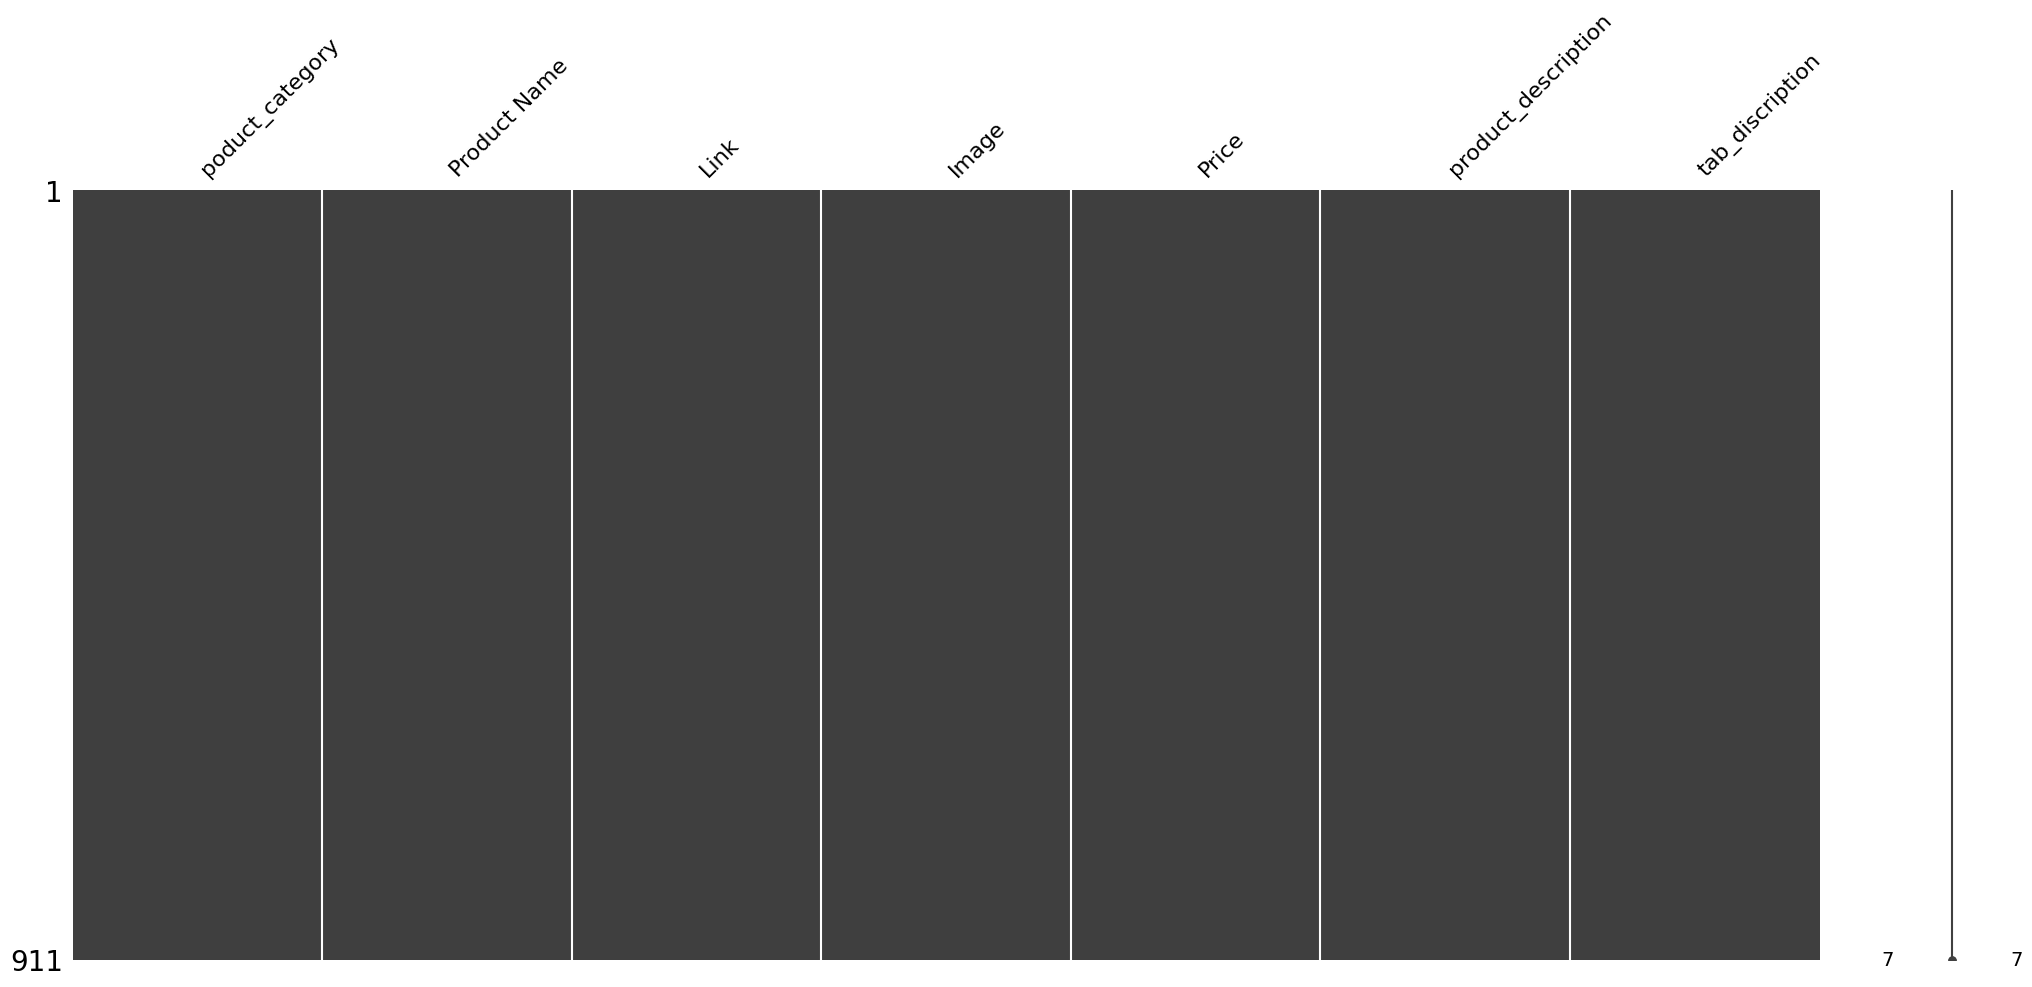

In [14]:
missingno.matrix(df)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   poduct_category      911 non-null    object
 1   Product Name         911 non-null    object
 2   Link                 911 non-null    object
 3   Image                911 non-null    object
 4   Price                911 non-null    object
 5   product_description  911 non-null    object
 6   tab_discription      911 non-null    object
dtypes: object(7)
memory usage: 49.9+ KB


In [16]:
df.columns

Index(['poduct_category', 'Product Name', 'Link', 'Image', 'Price',
       'product_description', 'tab_discription'],
      dtype='object')

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Axes: ylabel='poduct_category'>

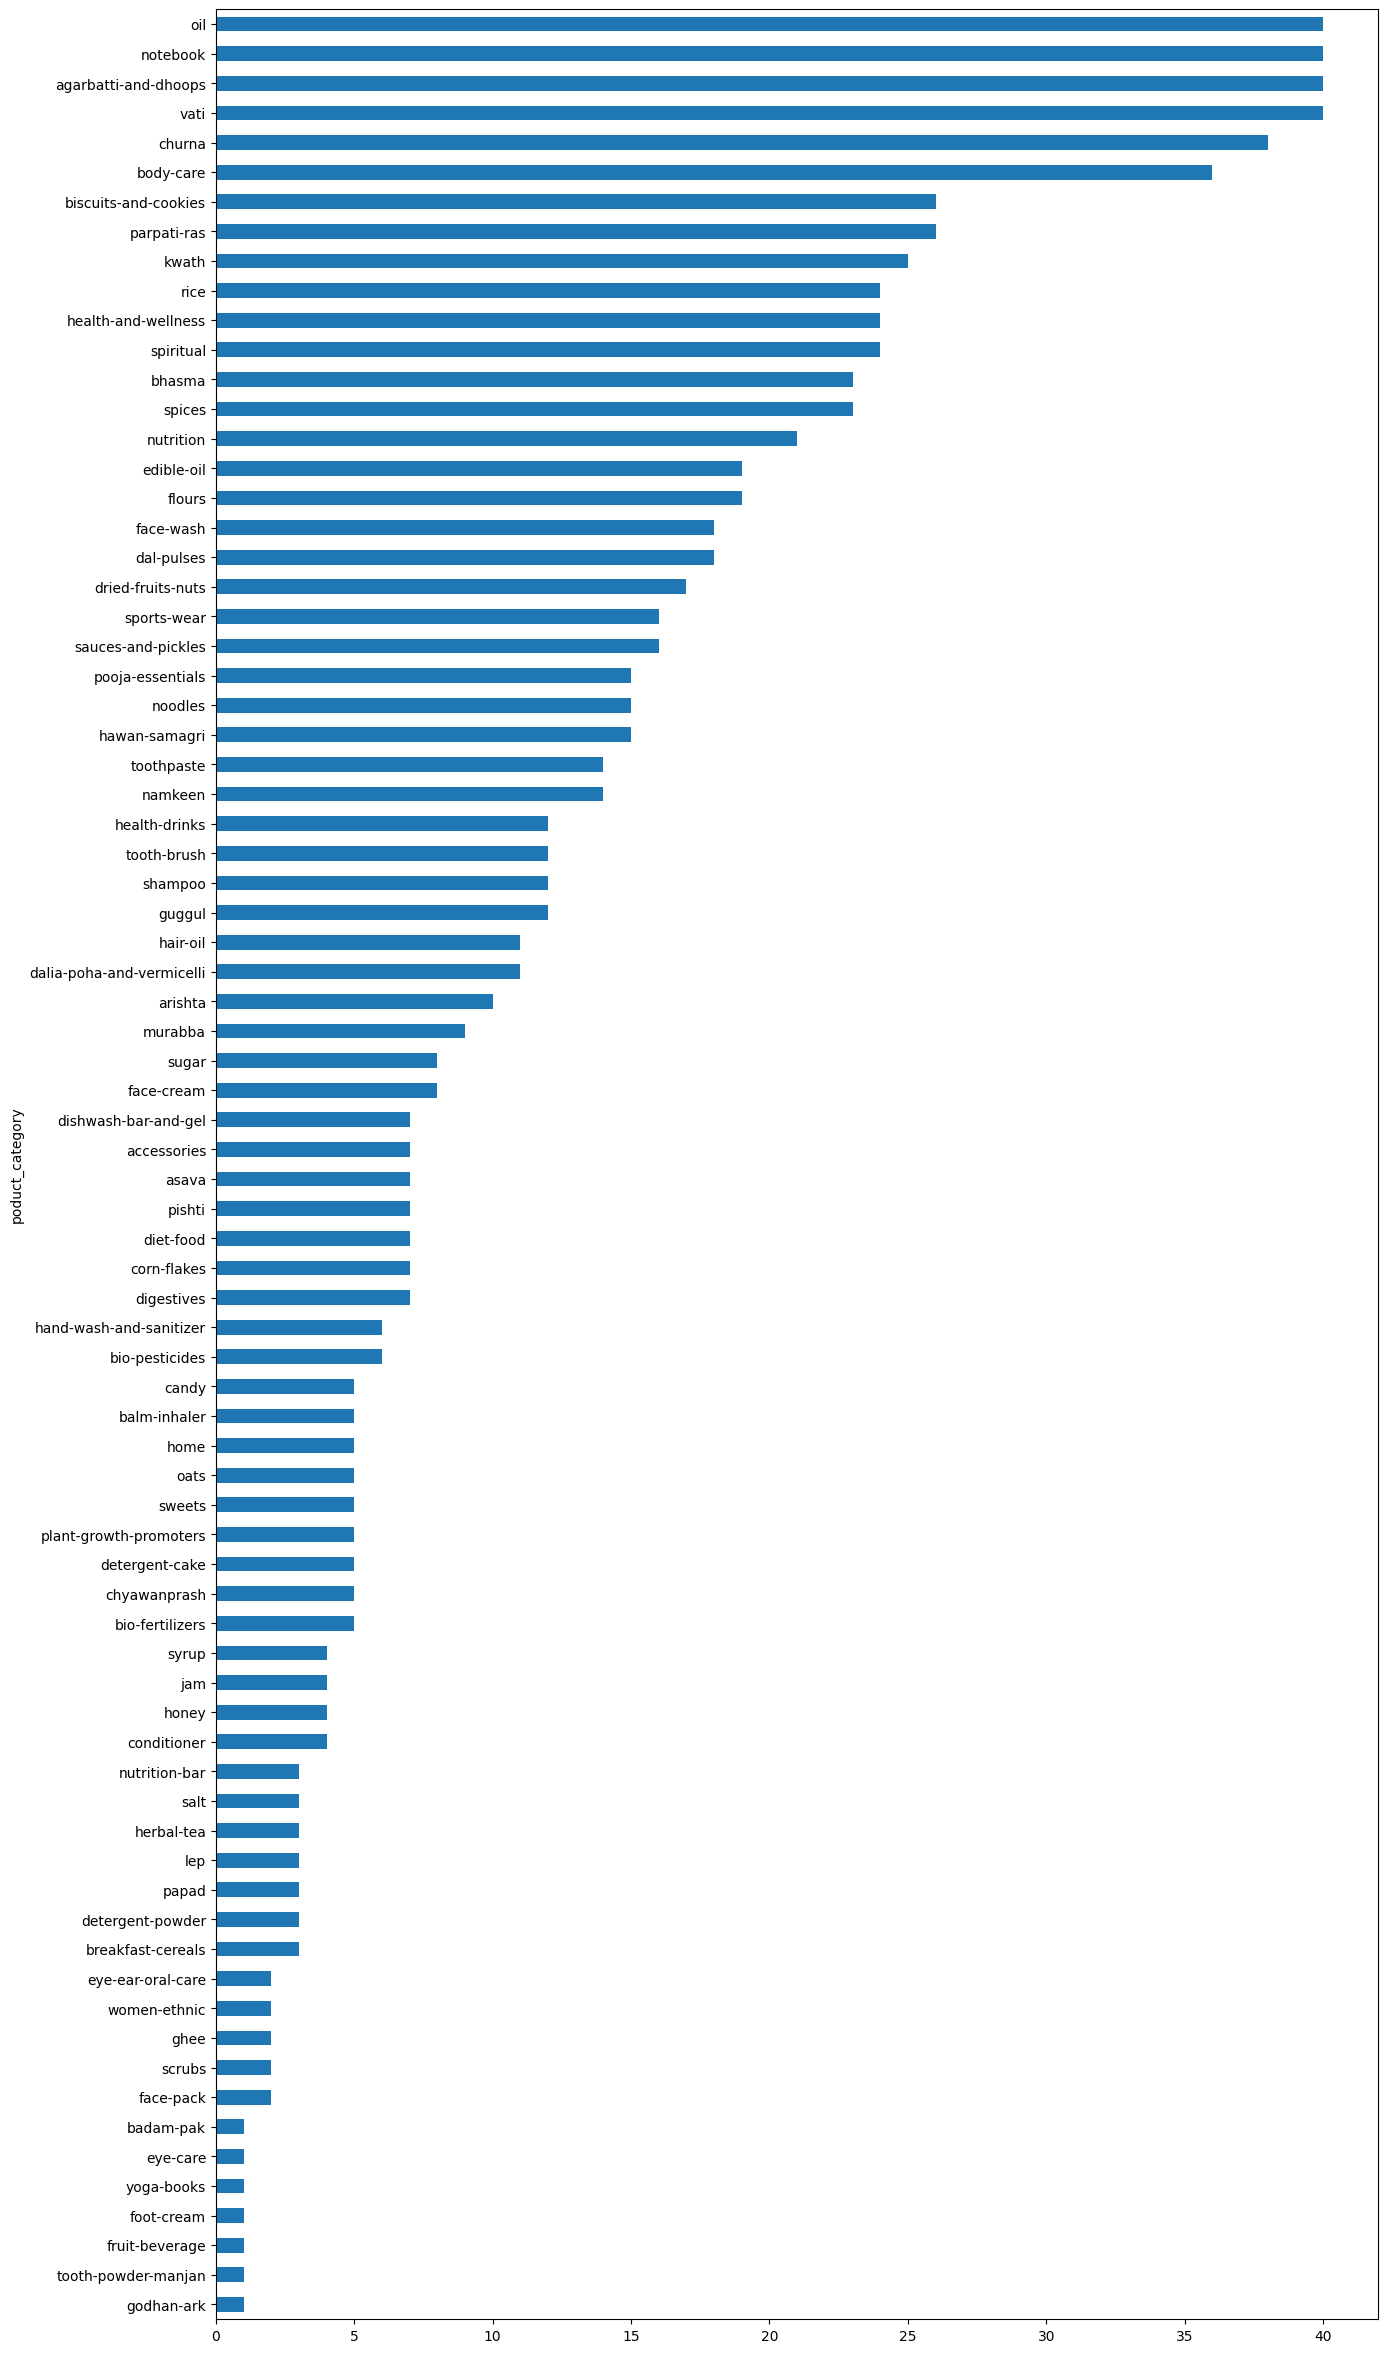

In [31]:
plt.figure(figsize=(15, 30))
df['poduct_category'].value_counts().sort_values(ascending=True).plot(kind='barh')

# Data Cleaning on Price

In [43]:
for i in df['Price']:
    print(re.findall(r'\d+', i)[0])

81
71
76
52
43
43
245
310
500
125
40
500
150
280
130
190
80
100
90
59
350
76
100
100
225
30
180
750
230
210
290
370
324
252
252
125
145
665
649
103
325
410
210
185
185
124
90
150
100
100
100
75
80
90
100
60
60
90
60
55
65
68
12
75
125
5
50
5
20
10
75
50
5
50
10
35
35
50
50
10
20
10
5
5
5
5
10
5
20
133
143
133
138
110
81
81
76
67
57
59
57
43
53
43
48
24
29
34
10
10
170
485
140
175
150
180
150
75
85
95
125
125
70
70
100
155
200
220
220
310
200
400
440
45
30
70
55
45
78
95
44
108
105
115
60
58
35
45
70
65
65
60
80
100
55
75
155
150
110
120
234
280
230
200
145
220
240
140
200
50
50
45
100
90
160
150
50
110
475
100
250
95
120
140
70
430
120
55
125
160
79
59
79
87
62
175
214
125
168
150
98
126
220
733
75
100
170
445
119
160
130
160
140
140
150
845
140
180
170
845
128
165
110
530
390
170
786
1075
10
12
12
12
12
40
48
48
120
120
192
192
120
120
96
45
100
35
65
15
52
50
50
46
10
10
10
115
10
10
10
58
10
50
10
55
10
66
70
235
145
125
360
230
290
120
145
120
125
350
240
580
310
595
515
720
195
20

In [44]:
def exact_price(x):
    main_price = re.findall(r'\d+', x)[0]
    return main_price

In [46]:
df['Price'] = df['Price'].map(lambda x : int(re.findall(r'\d+', x)[0]))

In [52]:
df['Price'].dtype

dtype('int64')

In [55]:
df['Price'].value_counts()

Price
60     30
45     29
35     29
100    26
10     26
       ..
275     1
808     1
195     1
720     1
555     1
Name: count, Length: 222, dtype: int64

## Data Cleaning on product_description & tab_discription

In [58]:
df.columns

Index(['poduct_category', 'Product Name', 'Link', 'Image', 'Price',
       'product_description', 'tab_discription'],
      dtype='object')

552, 615, 616, 618, 723, 751, 755, 761, 762, 766, 764

In [ ]:
for i, j in enumerate(df[column]):
    print(i, "----> ", j)

In [139]:
def cleaned(column):
    for i, j in enumerate(df[column]):
        print(i, " Old----> ", j)

    
        print("New ----->   ", nfx.clean_text(df.loc[i, column], 
        puncts=False,
        stopwords=False,
        urls=True,
        emails=True,
        special_char=False,
        numbers=False,
        phone_num=True,
        non_ascii=True,
        multiple_whitespaces=True,
        contractions=True,
        currency_symbols=False), "\n\n\n\n\n")

In [155]:
cleaned("product_description")

0  Old---->  patanjali pachak jal jeera helps cooling body antiacidic antiphlegmatic carminative digestive contains essential minerals beneficial body functions helps increasing digestive power acts refresher helps treating problems like amlapitta indigestion loss appetite laziness indian beverage served appetizer
New ----->    patanjali pachak jal jeera helps cooling body antiacidic antiphlegmatic carminative digestive contains essential minerals beneficial body functions helps increasing digestive power acts refresher helps treating problems like amlapitta indigestion loss appetite laziness indian beverage served appetizer 





1  Old---->  patanjali pachak contain ajwain heeng fenugreek properties lemon healthy digestive system patanjali pachak digestive hing goli blending rich natural organic herbs spices right proportion cure problems like gas acidity constipation etc eat open heart digest patanjali pachak hing goli
New ----->    patanjali pachak contain ajwain heeng fenugreek pr

In [ ]:
\n , *, **

In [ ]:
\r\n

In [145]:
df.columns

Index(['poduct_category', 'Product Name', 'Link', 'Image', 'Price',
       'product_description', 'tab_discription'],
      dtype='object')

In [146]:
PP = list(map(lambda x:nfx.clean_text(x, 
    puncts=True,
    stopwords=True,
    urls=True,
    emails=True,
    special_char=True,
    numbers=True,
    phone_num=True,
    non_ascii=True,
    multiple_whitespaces=True,
    contractions=True,
    currency_symbols=True), df.loc[:, 'product_description'])) 

In [149]:
df['product_description'] = pd.DataFrame(PP)

In [150]:
df['product_description']

0      patanjali pachak jal jeera helps cooling body ...
1      patanjali pachak contain ajwain heeng fenugree...
2      unique formulation patanjali pachak ajwain alo...
3      patanjali pachak hing peda rich quality hing i...
4      pachak shodhit harad options patanjali natural...
                             ...                        
906                                      patanjali umang
907    gebrika complete product fulfils growth requir...
908    based ionic non ionic compound increase effica...
909    known form silica easily absorbed plants fasal...
910    patanjali jaivik kranti best allrounder bio pr...
Name: product_description, Length: 911, dtype: object

In [151]:
LL = list(map(lambda x:nfx.clean_text(x, 
    puncts=True,
    stopwords=True,
    urls=True,
    emails=True,
    special_char=True,
    numbers=True,
    phone_num=True,
    non_ascii=True,
    multiple_whitespaces=True,
    contractions=True,
    currency_symbols=True), df.loc[:, 'tab_discription'])) 

In [152]:
df['tab_discription'] =  pd.DataFrame(LL)

#### Dropping Duplicates

In [160]:
df.drop_duplicates(inplace= True)

In [161]:
df.shape

(891, 7)

In [163]:
df.to_csv("all_product_details.csv", index=False)

In [164]:
df.shape

(891, 7)

## The below code was for Trial and Error to develop the final (above) code

In [ ]:
product_link = 'https://www.patanjaliayurved.net/product/natural-health-care/health-and-wellness/sea-buckthorn-capsule/3306'

response = requests.get(product_link)
soup = BeautifulSoup(response.text, 'html.parser')

quickview_peragraph_divs = soup.find_all('div', {'class': 'quickview-peragraph'})
tab_peragraph_divs = soup.find_all('div', {'class': 'tabs'})

product_description = ""
tab_discription = ""

for p_disc, tab_disc in zip(quickview_peragraph_divs, tab_peragraph_divs):
    product_description += p_disc.get_text(strip=True) + "\n"
    tab_discription += tab_disc.get_text(strip=True) + "\n"


# print(product_description , "\n\n\n", tab_discription)


In [ ]:
print(product_description , "\n\n\n", tab_discription)

In [ ]:
from bs4 import BeautifulSoup

product_link = 'https://www.patanjaliayurved.net/category/natural-health-care/1'

response = requests.get(product_link)
soup = BeautifulSoup(response.text, 'html.parser')


# Find the <ul> tag with class "group-list"
ul_tag = soup.find('ul', class_='nav__list')

# Find all <a> tags within the <ul> tag
if ul_tag:
    links = [a['href'] for a in ul_tag.find_all('a')]
    print(links, end="\n")
else:
    print("UL tag not found.")


In [ ]:
links

In [ ]:
import re

for url in links:
    
    # url = 'https://www.patanjaliayurved.net/category/seeds/255'
    print(url)
    print(re.findall(r'[A-Z-a-z]+', url)[-1])
    print("\n")


